<a href="https://colab.research.google.com/github/Noorbaignuroo/Data-Analyst-YoungDev/blob/main/Deep_Learning_for_Image_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



**Unzip the Dataset**

In [4]:
# Corrected unzip command
!unzip -q /content/archive.zip -d dataset



**Data Preparation**

In [5]:
# Define paths
train_dir = 'dataset/training_set'
test_dir = 'dataset/test_set'

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')


Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


**Build Convolutional Neural Network (CNN)**

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Train the Model**

In [7]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
251/251 [==============================] - 71s 280ms/step - loss: 0.0030 - accuracy: 0.9963 - val_loss: 3.8526e-16 - val_accuracy: 1.0000
Epoch 2/10
251/251 [==============================] - 75s 300ms/step - loss: 2.1052e-13 - accuracy: 1.0000 - val_loss: 3.8526e-16 - val_accuracy: 1.0000
Epoch 3/10
251/251 [==============================] - 75s 300ms/step - loss: 8.3283e-14 - accuracy: 1.0000 - val_loss: 3.8526e-16 - val_accuracy: 1.0000
Epoch 4/10
251/251 [==============================] - 76s 302ms/step - loss: 5.6067e-13 - accuracy: 1.0000 - val_loss: 3.8526e-16 - val_accuracy: 1.0000
Epoch 5/10
251/251 [==============================] - 80s 318ms/step - loss: 2.8138e-13 - accuracy: 1.0000 - val_loss: 3.8526e-16 - val_accuracy: 1.0000
Epoch 6/10
251/251 [==============================] - 72s 286ms/step - loss: 5.8934e-14 - accuracy: 1.0000 - val_loss: 3.8526e-16 - val_accuracy: 1.0000
Epoch 7/10
251/251 [==============================] - 75s 300ms/step - loss: 2.9889e-1

**Evaluate the Model**

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


64/64 [==============================] - 7s 102ms/step - loss: 3.8526e-16 - accuracy: 1.0000
Test Accuracy: 1.0


**Visualize Training History**

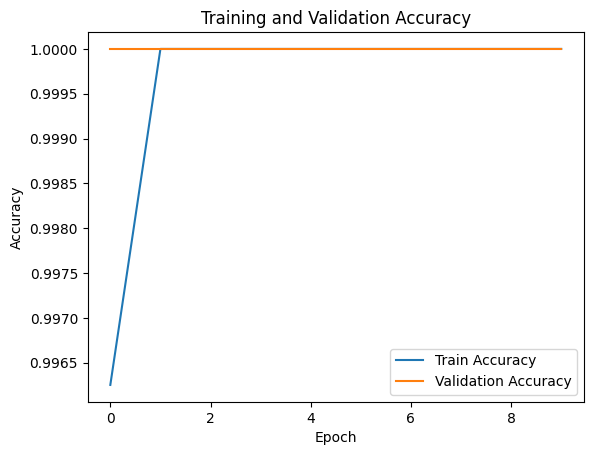

In [10]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Make Predictions**

1/1 [==============================] - 0s 333ms/step


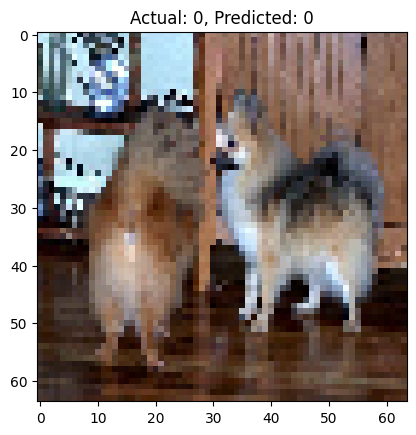

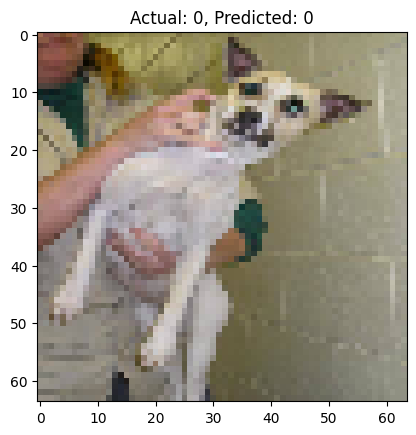

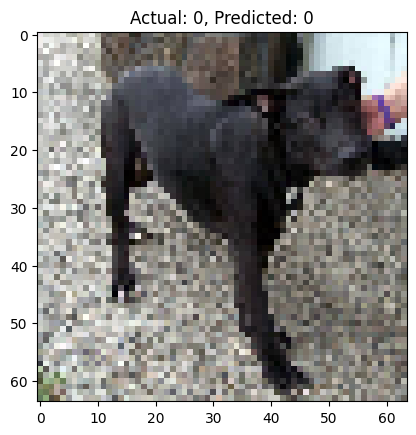

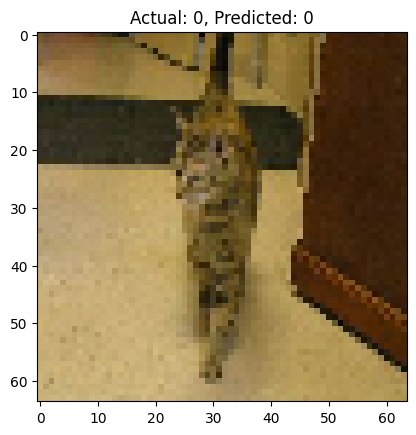

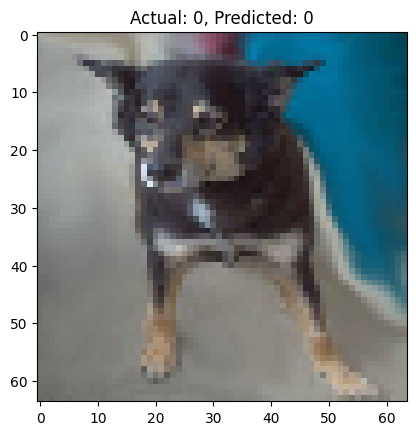

In [11]:
# Make predictions on a few test samples
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Visualize the first few test samples and their predictions
for i in range(5):
    plt.imshow(test_images[i])
    plt.title(f'Actual: {int(test_labels[i])}, Predicted: {round(predictions[i][0])}')
    plt.show()


**Save the Model**

In [9]:
# Save the trained model
model.save('cat_dog_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
